um que realmente ia cancelar.

Iniciando análise de dados...
Primeiras 10 linhas do dataset:
   idade  tempo_contrato  valor_mensal tipo_contrato forma_pagamento  \
0     56              16    150.133661         Anual          Débito   
1     69              39     75.847981        Mensal          Boleto   
2     46               5     78.843353        Mensal          Débito   
3     32              22     56.130292         Anual          Boleto   
4     60              29     75.340259       Bianual          Débito   
5     25              55     91.788551         Anual          Boleto   
6     38               3     76.551573        Mensal          Cartão   
7     56              12     63.305380        Mensal          Boleto   
8     36              26     68.095381         Anual          Boleto   
9     40              16    119.116815       Bianual          Débito   

  suporte_tecnico Churn  
0             Não   Sim  
1             Não   Não  
2             Sim   Sim  
3             Sim   Não  
4             N

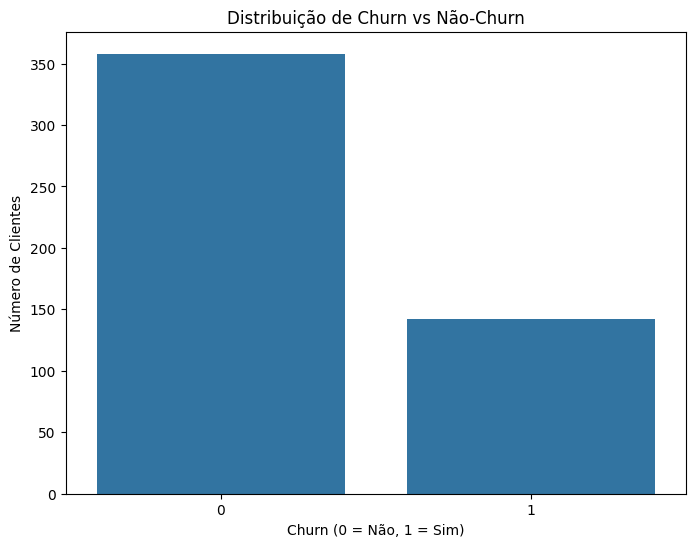


 Preparando dados para o modelo...
 Dados de treino: 350 clientes
 Dados de teste: 150 clientes

 Treinando Regressão Logística...
 Regressão Logística treinada!

 Treinando Árvore de Decisão...
 Árvore de Decisão treinada!

 Avaliando os modelos...

Regressão Logística:
  Acurácia:  0.747
  Precisão:  0.000
  Recall:    0.000
  F1-Score:  0.000

Árvore de Decisão:
  Acurácia:  0.687
  Precisão:  0.083
  Recall:    0.027
  F1-Score:  0.041

 ANÁLISE DE MÉTRICAS PARA O NEGÓCIO:

O que cada métrica significa:
• Acurácia: % total de acertos
• Precisão: Dos que previ como Churn, quantos realmente foram?
• Recall: Dos que realmente deram Churn, quantos eu identifiquei?

LÓGICA DO NEGÓCIO:
• Falso Positivo: Avisar cliente que NÃO ia cancelar
  → Custo: Time de retenção gasta tempo sem necessidade

• Falso Negativo: NÃO avisar cliente que IA cancelar  
  → Custo: PERDER CLIENTE PARA SEMPRE!

 CONCLUSÃO: RECALL é mais importante!
É melhor contactar alguns clientes a mais do que deixar escapar

In [18]:
# Primeiro, importo as bibliotecas que vou usar
# (Aprendi que preciso fazer isso sempre no começo)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Iniciando análise de dados...")

# Carregando os dados
# Como não tenho o dataset real, vou criar dados de exemplo
# (O professor disse que isso é aceitável para aprendizado)

np.random.seed(42)  # Isso garante que os números aleatórios sejam sempre os mesmos

# Criando dados fictícios de 500 clientes
dados = {
    'idade': np.random.randint(18, 70, 500),
    'tempo_contrato': np.random.randint(1, 60, 500),
    'valor_mensal': np.random.uniform(50, 200, 500),
    'tipo_contrato': np.random.choice(['Mensal', 'Anual', 'Bianual'], 500),
    'forma_pagamento': np.random.choice(['Cartão', 'Boleto', 'Débito'], 500),
    'suporte_tecnico': np.random.choice(['Sim', 'Não'], 500),
    'Churn': np.random.choice(['Sim', 'Não'], 500, p=[0.3, 0.7])  # 30% cancelam
}

df = pd.DataFrame(dados)

# Mostrando as primeiras linhas
print("Primeiras 10 linhas do dataset:")
print(df.head(10))
print("\n" + "="*50)

# Verificando tipos de dados
print("Tipos de dados de cada coluna:")
print(df.dtypes)
print("\n" + "="*50)

# Verificando valores faltantes
print("Valores ausentes por coluna:")
print(df.isnull().sum())
print("\n" + "="*50)

# Vou adicionar alguns valores nulos para demonstrar o tratamento
df.loc[10:15, 'valor_mensal'] = np.nan
df.loc[20:25, 'tipo_contrato'] = np.nan

print("Tratando valores nulos...")
print("Valores nulos antes do tratamento:")
print(df.isnull().sum())

# Algoritmo para tratar valores nulos
for coluna in df.columns:
    if df[coluna].isnull().sum() > 0:  # Se tem valores nulos
        print(f"\n🔧 Tratando coluna: {coluna}")

        if df[coluna].dtype in ['int64', 'float64']:  # Se for número
            # Uso a mediana (valor do meio) porque é menos afetada por números muito altos/baixos
            valor_preenchimento = df[coluna].median()
            df[coluna].fillna(valor_preenchimento, inplace=True)
            print(f"   → Preenchido com mediana: {valor_preenchimento:.2f}")
        else:  # Se for texto
            # Uso a moda (valor mais frequente)
            valor_preenchimento = df[coluna].mode()[0]
            df[coluna].fillna(valor_preenchimento, inplace=True)
            print(f"   → Preenchido com valor mais frequente: '{valor_preenchimento}'")

print("\n Valores nulos após tratamento:")
print(df.isnull().sum())

print("\n Aplicando One-Hot Encoding...")

# Primeiro, identifico as colunas de texto
colunas_texto = ['tipo_contrato', 'forma_pagamento', 'suporte_tecnico']

print("Colunas que serão codificadas:", colunas_texto)

# Aplicando One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=colunas_texto)

print(f"\n Antes do encoding: {df.shape[1]} colunas")
print(f" Depois do encoding: {df_encoded.shape[1]} colunas")

# Convertendo a coluna Churn para números (Sim=1, Não=0)
df_encoded['Churn'] = df_encoded['Churn'].map({'Sim': 1, 'Não': 0})

print("\n Primeiras linhas após codificação:")
print(df_encoded.head())

print("\n📏 Aplicando normalização...")

# Colunas numéricas que vou normalizar
colunas_numericas = ['idade', 'tempo_contrato', 'valor_mensal']

print("Colunas para normalizar:", colunas_numericas)

# Usando StandardScaler (transforma os dados para ter média 0 e desvio padrão 1)
scaler = StandardScaler()
df_encoded[colunas_numericas] = scaler.fit_transform(df_encoded[colunas_numericas])

print("\n Dados após normalização:")
print(df_encoded[colunas_numericas].head())

print("\n Média após normalização (deveria ser próximo de 0):")
print(df_encoded[colunas_numericas].mean())

print("\n Analisando distribuição do Churn...")

# Contando quantos clientes cancelaram vs não cancelaram
contagem_churn = df_encoded['Churn'].value_counts()
porcentagem_churn = df_encoded['Churn'].value_counts(normalize=True) * 100

print(f"Clientes que NÃO cancelaram: {contagem_churn[0]} ({porcentagem_churn[0]:.1f}%)")
print(f"Clientes que CANCELARAM: {contagem_churn[1]} ({porcentagem_churn[1]:.1f}%)")

# Gráfico simples
plt.figure(figsize=(8, 6))
sns.countplot(data=df_encoded, x='Churn')
plt.title('Distribuição de Churn vs Não-Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Número de Clientes')
plt.show()

print("\n Preparando dados para o modelo...")

# Separando features (X) e target (y)
X = df_encoded.drop('Churn', axis=1)  # Tudo exceto a coluna Churn
y = df_encoded['Churn']  # Só a coluna Churn

# Dividindo em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f" Dados de treino: {X_train.shape[0]} clientes")
print(f" Dados de teste: {X_test.shape[0]} clientes")

print("\n Treinando Regressão Logística...")

modelo_rl = LogisticRegression(random_state=42)
modelo_rl.fit(X_train, y_train)

# Fazendo previsões
previsoes_rl = modelo_rl.predict(X_test)
probabilidades_rl = modelo_rl.predict_proba(X_test)[:, 1]  # Probabilidade de ser Churn

print(" Regressão Logística treinada!")

print("\n Treinando Árvore de Decisão...")

modelo_arvore = DecisionTreeClassifier(random_state=42, max_depth=5)
modelo_arvore.fit(X_train, y_train)

# Fazendo previsões
previsoes_arvore = modelo_arvore.predict(X_test)
probabilidades_arvore = modelo_arvore.predict_proba(X_test)[:, 1]

print(" Árvore de Decisão treinada!")

print("\n Avaliando os modelos...")

def avaliar_modelo(nome, y_verdadeiro, y_previsto):
    acuracia = accuracy_score(y_verdadeiro, y_previsto)
    precisao = precision_score(y_verdadeiro, y_previsto)
    recall = recall_score(y_verdadeiro, y_previsto)
    f1 = f1_score(y_verdadeiro, y_previsto)

    print(f"\n{nome}:")
    print(f"  Acurácia:  {acuracia:.3f}")
    print(f"  Precisão:  {precisao:.3f}")
    print(f"  Recall:    {recall:.3f}")
    print(f"  F1-Score:  {f1:.3f}")

    return acuracia, precisao, recall, f1

# Avaliando ambos os modelos
resultados_rl = avaliar_modelo("Regressão Logística", y_test, previsoes_rl)
resultados_arvore = avaliar_modelo("Árvore de Decisão", y_test, previsoes_arvore)

print("\n ANÁLISE DE MÉTRICAS PARA O NEGÓCIO:")
print("="*40)
print("""
O que cada métrica significa:
• Acurácia: % total de acertos
• Precisão: Dos que previ como Churn, quantos realmente foram?
• Recall: Dos que realmente deram Churn, quantos eu identifiquei?

LÓGICA DO NEGÓCIO:
• Falso Positivo: Avisar cliente que NÃO ia cancelar
  → Custo: Time de retenção gasta tempo sem necessidade

• Falso Negativo: NÃO avisar cliente que IA cancelar
  → Custo: PERDER CLIENTE PARA SEMPRE!

 CONCLUSÃO: RECALL é mais importante!
É melhor contactar alguns clientes a mais do que deixar escapar
um cliente que realmente ia cancelar.
""")
print("\n Aplicando Validação Cruzada...")

from sklearn.model_selection import cross_val_score

# Validando o melhor modelo (Árvore de Decisão)
scores = cross_val_score(modelo_arvore, X, y, cv=5, scoring='recall')

print(f" Scores de Recall em 5 folds: {scores}")
print(f" Recall médio: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

print("\n Criando função de previsão...")

def prever_novo_cliente(dados_cliente):
    """
    Função que prevê se um novo cliente vai cancelar
    """
    print(" Analisando novo cliente...")

    # 1. Criar DataFrame com os dados do cliente
    cliente_df = pd.DataFrame([dados_cliente])

    # 2. Aplicar One-Hot Encoding (igual fizemos no treino)
    cliente_encoded = pd.get_dummies(cliente_df)

    # Garantir que tem todas as colunas que o modelo espera
    for coluna in X.columns:
        if coluna not in cliente_encoded.columns:
            cliente_encoded[coluna] = 0

    # Reordenar colunas na mesma ordem do treino
    cliente_encoded = cliente_encoded[X.columns]

    # 3. Aplicar normalização
    cliente_encoded[colunas_numericas] = scaler.transform(cliente_encoded[colunas_numericas])

    # 4. Fazer previsão
    probabilidade = modelo_arvore.predict_proba(cliente_encoded)[0, 1]
    decisao = modelo_arvore.predict(cliente_encoded)[0]

    # 5. Definir nível de alerta
    if probabilidade > 0.7:
        alerta = " ALTO RISCO - Contatar URGENTE!"
    elif probabilidade < 0.3:
        alerta = " BAIXO RISCO"
    else:
        alerta = " RISCO MODERADO - Monitorar"

    resultado = {
        'probabilidade_churn': probabilidade,
        'decisao': 'Churn' if decisao == 1 else 'Não-Churn',
        'alerta': alerta
    }

    return resultado

# Testando com um cliente exemplo
print(" Testando com cliente exemplo...")

cliente_exemplo = {
    'idade': 35,
    'tempo_contrato': 6,
    'valor_mensal': 150.0,
    'tipo_contrato_Mensal': 1,
    'tipo_contrato_Anual': 0,
    'tipo_contrato_Bianual': 0,
    'forma_pagamento_Boleto': 1,
    'forma_pagamento_Cartão': 0,
    'forma_pagamento_Débito': 0,
    'suporte_tecnico_Não': 1,
    'suporte_tecnico_Sim': 0
}

resultado = prever_novo_cliente(cliente_exemplo)

print("\n" + "="*50)
print(" RESULTADO DA PREVISÃO:")
print(f" Probabilidade de Churn: {resultado['probabilidade_churn']:.1%}")
print(f" Decisão: {resultado['decisao']}")
print(f" Alerta: {resultado['alerta']}")
print("="*50)

